[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_01/blob/master/Th01_CCS-Solution_of_Vector_Mean_Coding_Challenge.ipynb)

In [0]:
import numpy as np

Write a function that takes in a vector (in the form of a 1D numpy array) and returns the average value across its components.

For example, [4,2] should return 3 and [5, 6, 7, 8] should return 6.5. You can assume the vector will have at least one coomponent.

In [0]:
#vector = 0

def average(vector):
  return sum(vector) / len(vector)

Let's see if it worked:

In [6]:
testSet = [[np.array([1, 2, 3, 4]), 2.5],
        [np.array([18, 65, 11]), 94/3],
        [np.array([10]), 10],
        [np.array([-8]), -8],
        [np.array([-4,-1,-2]), -7/3],
        [np.array([0,0,0]), 0],
        [np.array([-10,10]), 0]]

for test in testSet:
  if (average(test[0]) == test[1]):
    print ("Correct result")
  else:
    print ("Incorrect result")

Correct result
Correct result
Correct result
Correct result
Correct result
Correct result
Correct result


## Bonus Challenge

`testSet` is a small group of points. Rearrange the values in testSet to be 2d, then rotate them around their centroid by 45 degrees.

*Data analysis*

Input data is a 2d matrix containing an array in the first column and an average in the second.

Data scientist determined that the "data" was in the 1st column, 2nd column is undesirable meta data: the mean of each 1st column. Discarded 2nd column.


[  1   2   3   4  18  65  11  10  -8  -4  -1  -2   0   0   0 -10  10]
(17,)
### z ###
[[  1   2   3   4  18  65  11  10  -8]
 [ -4  -1  -2   0   0   0 -10  10   0]]
[[11.77777778]
 [-0.77777778]]


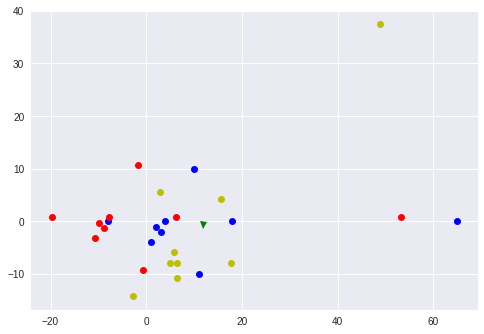

In [81]:
# rearrange
data = []
for x in testSet:
  y = x[0].flatten()
  data.append(y.flatten())

result = np.concatenate(data)

print(result)
print(result.shape)

result = np.append(result,0) # took me 10 minutes

z = np.matrix(result)

z = z.reshape((2,-1))

print("### z ###")
print(z)

### data munging is a pain! ###

import matplotlib.pyplot as plt

#z[0:1:,::] # the first row of z
#z[start:end:step_size, start:end:step_size]

# plot z:
plt.plot(z[0:1:,::],z[1:2:,::],'bo')

# find centroid
centroid = np.mean(z,1)

print(centroid)
plt.plot(centroid[0],centroid[1],'gv')

# translate
centered = z - centroid
plt.plot(centered[0:1:,::],centered[1:2:,::],'ro')

# rotate
theta = np.pi/4
R = np.matrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
rotated = R * centered



# undo translation
final = rotated + centroid

plt.plot(final[0:1:,::],final[1:2:,::],'yo')